# Data Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read Data
inspection_data = pd.read_csv('/Users/yangmen/downloads/Restruant_Inspection/potential_inspection_summary_data.csv')
violation_data = pd.read_csv('/Users/yangmen/downloads/Restruant_Inspection/potential_violation_details_data.csv')

/Users/yangmen/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Select post-2012 data
inspection_data['inspection_date'] = pd.to_datetime(inspection_data['inspection_date'])
inspection_data['year'] = inspection_data['inspection_date'].dt.year.astype(float)
Status = list(map(lambda x: True if (x == 2015 or x == 2016 or x == 2017) else False, inspection_data.year))
inspection_data = inspection_data[Status]

In [4]:
# Drop critical violation and non-critical violation Columns since the dataset is for post-2012
columns = ['critical_violations', 'critical_violations_corrected_on_site', 'critical_violations_repeated',
          'noncritical_violations','noncritical_violations_corrected_on_site','noncritical_violations_repeated']
inspection_data.drop(columns, axis=1, inplace=True)
print(inspection_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31168 entries, 6198 to 68362
Data columns (total 30 columns):
inspection_id                                       31168 non-null int64
establishment_name                                  31168 non-null object
address                                             31168 non-null object
telephone                                           29298 non-null object
email                                               26532 non-null object
inspection_date                                     31168 non-null datetime64[ns]
inspection_time_in                                  31157 non-null object
inspection_time_out                                 24889 non-null object
license_holder                                      30808 non-null object
license_number                                      27794 non-null object
license_period_start                                30285 non-null object
license_period_end                                  30287 non-null 

In [5]:
# Assign 0 to any value that is NaN
inspection_data['priority_violations'] = list(map(lambda x: 0 if (np.isnan(x)) else x, 
                                                  inspection_data['priority_violations']))
inspection_data['priority_violations_corrected_on_site'] = list(map(lambda x: 0 if (np.isnan(x)) else x, 
                                                  inspection_data['priority_violations_corrected_on_site']))
inspection_data['priority_violations_repeated'] = list(map(lambda x: 0 if (np.isnan(x)) else x, 
                                                  inspection_data['priority_violations_repeated']))
inspection_data['priority_foundation_violations'] = list(map(lambda x: 0 if (np.isnan(x)) else x, 
                                              inspection_data['priority_foundation_violations']))
inspection_data['priority_foundation_violations_corrected_on_site'] = list(map(lambda x: 0 if (np.isnan(x)) else x, 
                                              inspection_data['priority_foundation_violations_corrected_on_site']))
inspection_data['priority_foundation_violations_repeated'] = list(map(lambda x: 0 if (np.isnan(x)) else x, 
                                              inspection_data['priority_foundation_violations_repeated']))
inspection_data['core_violations'] = list(map(lambda x: 0 if (np.isnan(x)) else x, 
                                              inspection_data['core_violations']))
inspection_data['core_violations_corrected_on_site'] = list(map(lambda x: 0 if (np.isnan(x)) else x, 
                                              inspection_data['core_violations_corrected_on_site']))
inspection_data['core_violations_repeated'] = list(map(lambda x: 0 if (np.isnan(x)) else x, 
                                              inspection_data['core_violations_repeated']))

In [6]:
# For public relseased dataset, publics doesn't want to see too much violations
# Total Violation supposed to be violation - corrected on site + violation repeated
inspection_data['violation_check'] = (inspection_data['priority_violations'] - 
                                      inspection_data['priority_violations_corrected_on_site'] + 
                                      inspection_data['priority_violations_repeated'] + 
                                      inspection_data['priority_foundation_violations'] - 
                                      inspection_data['priority_foundation_violations_corrected_on_site'] + 
                                      inspection_data['priority_foundation_violations_repeated'] + 
                                      inspection_data['core_violations'] -  
                                      inspection_data['core_violations_corrected_on_site'] + 
                                      inspection_data['core_violations_repeated'])

In [97]:
'''
inspection_data['violation_check'] = list(map(lambda x,y: True if (x == y) else False,  
                                              inspection_data['violation_check'], inspection_data['total_violations']))
inspection_data['violation_check'].groupby(inspection_data['violation_check']).count()
'''

In [7]:
# Valid Data
inspection_data = inspection_data[inspection_data['known_valid'] == True]

In [8]:
print(inspection_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21276 entries, 37084 to 68362
Data columns (total 31 columns):
inspection_id                                       21276 non-null int64
establishment_name                                  21276 non-null object
address                                             21276 non-null object
telephone                                           20038 non-null object
email                                               18334 non-null object
inspection_date                                     21276 non-null datetime64[ns]
inspection_time_in                                  21271 non-null object
inspection_time_out                                 21000 non-null object
license_holder                                      21049 non-null object
license_number                                      19046 non-null object
license_period_start                                20733 non-null object
license_period_end                                  20735 non-null

# Graph

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

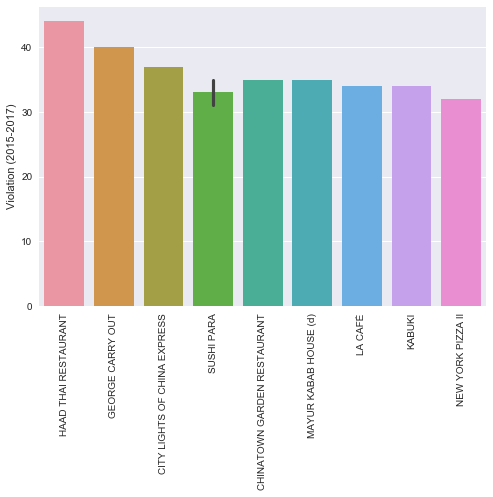

In [84]:
# The top 10 restruants with the highest violations
data1 = pd.DataFrame(inspection_data['establishment_name'])
data2 = pd.DataFrame(inspection_data['violation_check'])
data = pd.concat([data1, data2], axis=1, ignore_index = True)
data.columns = ['name', 'violation']
data.sort_values(['violation'], ascending = 0,inplace=True)
data = data.head(10)
_ = sns.barplot(x='name', y='violation', data = data)
plt.xlabel('')
plt.ylabel('Violation (2015-2017)')
plt.xticks(rotation=90)
plt.show()

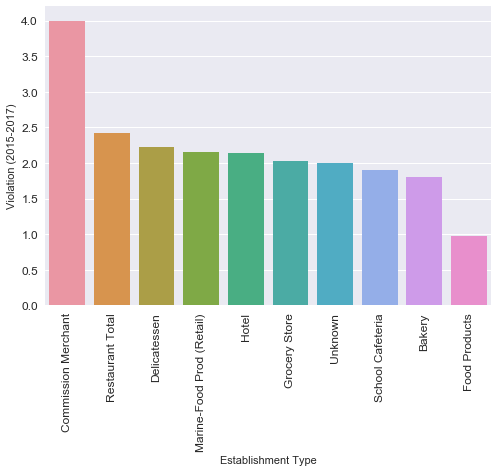

In [88]:
# The top 10 Establishment Type with the Highest Violation
data1 = pd.DataFrame(inspection_data['establishment_type'])
data2 = pd.DataFrame(inspection_data['violation_check'])
data = pd.concat([data1, data2], axis=1, ignore_index = True)
data.columns = ['establishment_type', 'violation']
data = data.groupby('establishment_type').mean()
data.sort_values(['violation'], ascending = 0, inplace=True)
data = data.head(10)
data.reset_index(inplace = True)
_ = sns.barplot(x='establishment_type', y='violation', data = data)
plt.xlabel('Establishment Type')
plt.ylabel('Violation (2015-2017)')
plt.xticks(rotation=90)
_.tick_params(labelsize=12)
plt.show()